____

# <font color=#FFAA11> Two-Temperature Model </font>

The TTM considered here is given by
$$\begin{align}
\frac{\partial T_e}{\partial t} &= \frac{D_e}{r}\frac{\partial}{\partial r}\left(r\frac{\partial T_e}{\partial r}\right) - \kappa (T_e - T_i), \\
\frac{\partial T_i}{\partial t} &= \frac{D_i}{r}\frac{\partial}{\partial r}\left(r\frac{\partial T_i}{\partial r}\right) + \kappa (T_e - T_i),
\end{align}
$$
which assumes a cylindrical plasma composed of electrons and ions with no mass flow. There are two important things to do:
1. put these equations into a form we want to use
  * definitions/symbols 
  * spatially varying conductivities
  * make these choices consistent with the slides
2. check the code very carefully to be sure it is consistent with the form of the equations in the chosen coordinate system. 

Feel free to copy this notebook to make versions to experiment with; put your version information at the bottom of this cell. In terms of the model and its parameters, a good place to start is with the paper:
<font color=#5588FF>
* Improved Two-Temperature Model and Its Application in Ultrashort Laser Heating of Metal Films
  * Lan Jiang and Hai-Lung Tsai
  * _Journal of Heat Transfer_ **127**, 1167 (2005)
  </font>


This is a toy code just for the purposes of getting started. Three main areas where major improvements are needed:
1. physical predictions for the parameters:
  * specific heats,
  * temperature relaxation rate,
  * thermal conductivity,
2. density profiles $\left. n_j(\rho)\right|_{ j=\{e, i\}}$ used by the parameters,
3. units,
4. steady improvement of the numerical methods.

Nicer visualizations, including animations, would be nice to have in the long run.



To keep track of versions:
* <font color=#22EE55> Murillo, 28 April 2023 </font>

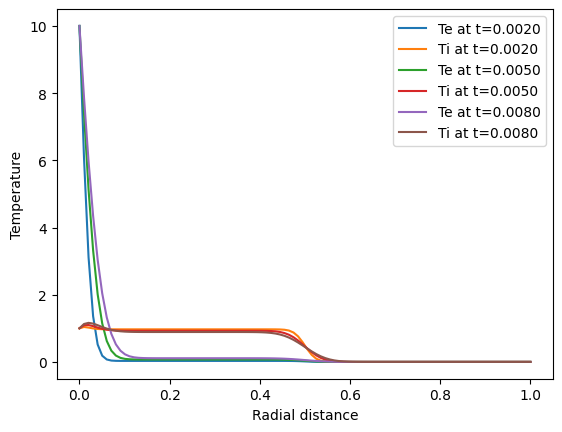

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of grid points
r_max = 1.0  # Maximum radial distance
dt = 1e-5  # Time step
t_max = 0.01  # Maximum simulation time
electron_diffusivity = 0.1  # Electron diffusivity constant
ion_diffusivity = 0.1  # Ion diffusivity constant
kappa = 15.5  # Temperature relaxation coefficient
plot_times = [0.002, 0.005, 0.008]  # Intermediate times for plotting

# Discretize spatial domain
r = np.linspace(0, r_max, n)
dr = r[1] - r[0]

# Initialize electron and ion temperature arrays
Te = np.zeros(n)
Ti = np.zeros(n)

# Set initial conditions
Te[0] = 10.0
Ti[0:50] = 1.0

# Time integration loop
t = 0
plot_idx = 0
fig, ax = plt.subplots()
while t < t_max:
    # Calculate new temperatures using explicit Euler method, finite differences, and relaxation
    Te_new = Te + dt * (
        electron_diffusivity * (np.roll(Te, -1) - 2 * Te + np.roll(Te, 1)) / dr**2
        - kappa * (Te - Ti)
    )
    Ti_new = Ti + dt * (
        ion_diffusivity * (np.roll(Ti, -1) - 2 * Ti + np.roll(Ti, 1)) / dr**2
        + kappa * (Te - Ti)
    )

    # Boundary conditions
    Te_new[0] = Te[0]  # Insulated boundary
    Te_new[-1] = 0
    Ti_new[0] = Ti[0]  # Insulated boundary
    Ti_new[-1] = 0

    # Update temperatures
    Te = Te_new
    Ti = Ti_new
    t += dt

    # Plot temperature profiles at intermediate times
    if plot_idx < len(plot_times) and t >= plot_times[plot_idx]:
        ax.plot(r, Te, label=f"Te at t={t:.4f}")
        ax.plot(r, Ti, label=f"Ti at t={t:.4f}")
        plot_idx += 1

# Plot settings
ax.set_xlabel("Radial distance")
ax.set_ylabel("Temperature")
ax.legend()
plt.show()
